In [2]:
def nums_visualisation(df,annotation=False):
    '''
    визуализация распределений количественных признаков: 
        - гисторгамма распределения 
        - boxplot распределения
    '''
    columns = df.columns
    cols_num = df.shape[1]

    fstr = '\033[1m{}\033[0m, '* (len(columns)-1) + '\033[1m{}\033[0m'
    if annotation: 
        print(('Всего признаков этого типа {}.\nК ним относятся: ' + fstr).
              format(len(columns),*columns))
    
    indent = 0.05
    fig = plt.figure(figsize=(14,3))
    for i,col in enumerate(columns):
        row = df[col]
        min_diff = pd.Series(row.unique()).sort_values().diff().min()
        bins = min(int((row.max()-row.min()) /min_diff + 1),100)
        
        fig.add_axes([1/cols_num*i, 0.35, 1/cols_num-indent, 1])
        plt.title(col)
        row.plot.hist(bins=bins,density=True)
    
        fig.add_axes([1/cols_num*i, 0, 1/cols_num-indent, 0.2])
        sns.boxplot(x=row)

    plt.tight_layout()
    
def num_visualisation(column,df, left_sloping=False):
    '''
    Визулизация распределения количественного ризнака:
        - гистограмма распределения в валидационной и в полной обучающей выборке 
        - boxplot распределения в валидационной и в полной обучающей выборке
        - гистограмма распределения  в валидационной выборке и в обучающей выборке на марках, 
        встречающихся в валидационной выборке
        - boxplot рапсределения в валидационной выборке и в обучающей выборке на марках, 
        встречающихся в валидационной выборке
    '''
    trn = df[df['sample']==1].dropna(subset=[column,'price'])
    tst = df[df['sample']==0].dropna(subset=[column])
    tst_brands = tst.brand.unique()
    brand_mask = [x in tst_brands for x in trn.brand]
    trn_ = trn[brand_mask]
    
    row_trn = trn[column] 
    row_tst = tst[column] 
    row_trn_ = trn_[column]     

    if left_sloping: 
        row_trn = np.log(2022 - row_trn)
        row_tst = np.log(2022 - row_tst)
        row_trn_ = np.log(2022 - row_trn_)        
    else:
        row_trn = np.log(row_trn+1)
        row_tst = np.log(row_tst+1)
        row_trn_ = np.log(row_trn_+1)
    
    fig = plt.figure(figsize=(14,3))
    
    nbins = 50
    rows_max = max(row_trn.max(),row_tst.max())
    rows_min = min(row_trn.min(),row_tst.min())    
    step = (rows_max-rows_min)/nbins
    bins = list(np.arange(rows_min,rows_max,step))
#*******************************************************************
    ax1 = fig.add_axes([0, 0.4, 0.3, 1])
    plt.title('Распределение '+column+' в train\n (на всех марках) и в test' )
    row_trn.plot.hist(bins=bins,density=True,alpha = 0.65)
    row_tst.plot.hist(bins=bins,density=True,alpha = 0.65)
    plt.legend(['train','test']) 
#*******************************************************************
    ax2 = fig.add_axes([0, 0, 0.3, 0.30]) 
    sns.boxplot(data = [row_trn,row_tst],orient='h',saturation = 0.5)
#*******************************************************************
    ax3 = fig.add_axes([0.35, 0.4, 0.30, 1])
    plt.title('Распределение '+column+' в train\n (только на марках из test) и в test' )
    row_trn_.plot.hist(bins=bins,density=True,alpha = 0.65)
    row_tst.plot.hist(bins=bins,density=True,alpha = 0.65)
    plt.legend(['train','test']) 
#*******************************************************************
    ax4 = fig.add_axes([0.35, 0, 0.30, 0.30]) 
    sns.boxplot(data = [row_trn_,row_tst],orient='h',saturation = 0.5)
#*******************************************************************
    ax5 = fig.add_axes([0.7, 0, 0.30, 1.4])
#     plt.style.use('classic')
    plt.title('Зависимость цены\n от '+column+' в logscale')
    x = row_trn # np.log(row_trn+1)
    y = trn.price
    ax5.set(xlim=(x.min(), x.max()), ylim=(y.min(), y.max()))
#     ax5.hist2d(x,y,bins=nbins)
#     ax5.scatter(x = x, y = y, alpha=0.0.05)
    ax5.hexbin(x,y, gridsize=25,bins='log')
    plt.show() 
    
def features_price_scatterplot(column):
    fig, ax = plt.subplots(1,len(most_popular_brands), figsize=(16, 6))
    for i,brand in enumerate(most_popular_brands):
        tmp = data[data.brand==brand]
        ax[i].scatter(x = tmp[column], y = tmp.offerprice, alpha=0.3)
        ax[i].set_title('для автмобилей марки ' + brand)
        ax[i].set_xlabel(column)
        ax[i].set_ylabel("offerprice")
        ax[i].set_yscale( "log")
    plt.show()

def features_price_scatterplot(df,stud_column,top_column, n_top):
    top = df[top_column].value_counts().index[:n_top]    
    fig, ax = plt.subplots(1,len(top), figsize=(20, 4))
    
def features_price_scatterplot(df,stud_column,top_column, n_top):
    top = df[top_column].value_counts().index[:n_top]    
    fig, ax = plt.subplots(1,len(top), figsize=(20, 4))

    for i,cat_val in enumerate(top):
        tmp = df[df[top_column]==cat_val]
        x = tmp[stud_column]
        y = tmp.price
        ax[i].scatter(x = x, y = y, alpha=0.3)
        ax[i].set_title('для '+ top_column + ' ' + str(cat_val))
        ax[i].set_xlabel(stud_column)
        ax[i].set_ylabel("price")
#         ax[i].set_yscale( "log")
        xmarg = 0.1*(x.max() - max(x.min(),0))
        ax[i].set_xlim(left=max(x.min(),0)-xmarg,right = x.max()+xmarg)
#         ax[i].set_xmargin(0.2)
    plt.show(x.max())    

## Импорт бибилиотек

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import date
from sklearn.feature_selection import f_regression, mutual_info_regression
from functools import reduce
from scipy.stats import spearmanr

import warnings

# %pylab 
%matplotlib inline

from project_7_functions import *

## Установка параметров и определение констант

In [4]:
from project_7_constants import *

warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 70)    # выведем больше строк
pd.set_option('display.max_columns', 30) # выведем больше колонок

##  Загрузка даных

In [5]:
df_kaggle = pd.read_csv(f'{path}auto_ru_2020_09_09.csv',low_memory=False)
df_kaggle_full = pd.read_csv(f'{path}all_auto_ru_09_09_2020.csv',low_memory=False)

test = pd.read_csv(f'{path}test.csv',low_memory=False)

In [6]:
# test.columns

## Приведение к единому виду

In [7]:
%%time 
externdata_test = externdata_test_unification(test)
# externdata_train = externdata_train_unification(df_kaggle)
externdata_train_full = externdata_train_unification(df_kaggle_full)

Wall time: 2min 50s


## Объединение test и train

In [8]:
# externdata_train['sample'] = 1  # помечаем где у нас трейн
externdata_train_full['sample'] = 1  # помечаем где у нас трейн
externdata_test['sample'] = 0   # помечаем где у нас тест
externdata_test['price'] = np.NaN  # в тесте нет значения price -  пока просто заполняем np.NaN
# объединяем
# externdata = externdata_test.append(externdata_train, sort=False).reset_index(drop=True) 
externdata_full = externdata_test.append(externdata_train_full, sort=False).reset_index(drop=True) 

## EDA
Разделим признаки на количественные `num_cols` , категориальные `cat_cols` и бинарные `bin_cols`.   
К бинарным, очевидно, отнесем признаки с двумя уникальными значениями.  
Категориальными признаками будем считать признаки с количеством уникальных значений от 3 до 27 а также очевидно категориальные название модели и марку автомобиля.   
Порогом для количественного признака будет наличие более чем 27 уникальных значений. При этом учитываем, что название модели и марку автомобиля из количественных признаков мы исключили.  


In [9]:
# Посмотри обьекты какого типа находятся теперь в колонках датасета.
externdata_full.apply(lambda x: type(x.iloc[0]))

bodyType                 <class 'str'>
brand                    <class 'str'>
color                    <class 'str'>
engineDisplacement     <class 'float'>
enginePower              <class 'int'>
equipment_dict          <class 'list'>
fuelType                 <class 'str'>
mileage                  <class 'int'>
modelDate                <class 'int'>
model_name               <class 'str'>
numberOfDoors            <class 'int'>
productionDate           <class 'int'>
vehicleTransmission      <class 'str'>
vendor                   <class 'str'>
Владельцы              <class 'float'>
Владение                 <class 'int'>
ПТС                      <class 'str'>
Привод                   <class 'str'>
Руль                     <class 'str'>
sample                   <class 'int'>
price                  <class 'float'>
dtype: object

Всё прилично, кроме `equipment_dict`, котрый содержит list опций. На этом этапе приведем этот признак к количеству опций. 

In [10]:
externdata_full.equipment_dict = externdata_full.equipment_dict.apply(len)

Определяем кличество уникальных знчений в каждой колонке и относим признак к соответсвующему типу данных (преобразвание `astype(str)` необходимо для избежания `TypeError: ("unhashable type: 'list'", 'occurred at index equipment_dict')`)

In [11]:
num_uniq = externdata_full.apply(lambda x: x.astype(str).nunique())
num_uniq

bodyType                  25
brand                     36
color                     16
engineDisplacement        69
enginePower              398
equipment_dict           114
fuelType                   5
mileage                24379
modelDate                 78
model_name              1104
numberOfDoors              5
productionDate            80
vehicleTransmission        4
vendor                     3
Владельцы                  4
Владение                 307
ПТС                        3
Привод                     3
Руль                       2
sample                     2
price                   8169
dtype: int64

In [12]:
bin_cols = externdata_full.columns[num_uniq==2].drop('sample')
cat_cols = externdata_full.columns[(num_uniq>2) & (num_uniq<28)].append(pd.Index(['model_name','brand'])) 
num_cols = externdata_full.columns[num_uniq>=28].drop(['model_name','brand','price'])

## Целевая переменная

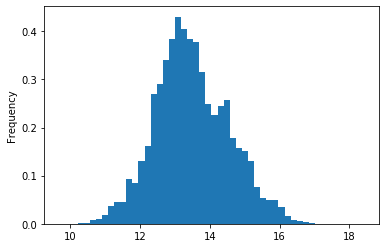

In [13]:
nbins = 50
np.log(externdata_full.price+1).plot.hist(bins=nbins,density=True)

In [14]:
externdata_full.price = np.log(externdata_full.price+1)

Рассмотрим признаки по типам
### Количественные
Ознакомимся с распределением всех признаков (гистограмма и boxplot на всем dataset)

Всего признаков этого типа 7.
К ним относятся: engineDisplacement, enginePower, equipment_dict, mileage, modelDate, productionDate, Владение


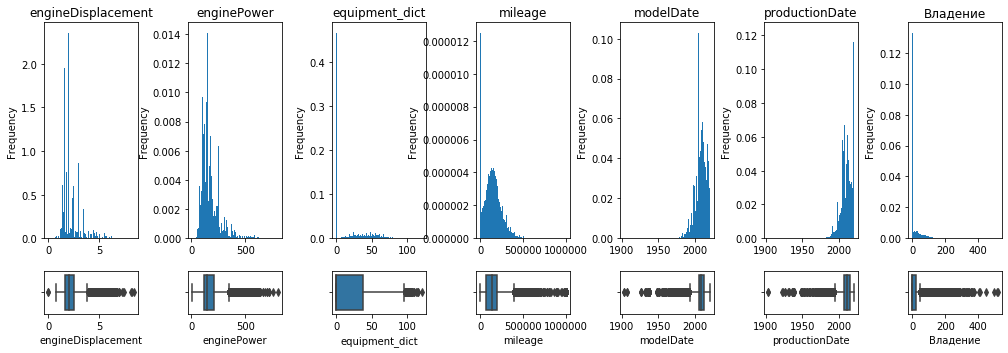

In [15]:
nums_visualisation(externdata_full[num_cols],annotation=True)

Как видим все количественные признаки имеют скошенное распределение:
- **engineDisplacement**, **enginePower**, **equipment_dict**,**mileage** и **Владение** скошены вправо;
- **modelDate**, **productionDate** скошены влево.   
    
Если бы мы испопльзовали модели, чувствтельные к ненормальности распределения признаков, следовало провести преобразование, например логарфимрование и наверное стандартизацию. Но я собираюсь использовать модели, строящий градиентный бустинг над деревьями. этот класс алгоритвмов нечувствителен к ненормальнотис, поэтому преобразование проводит не имеет смысла. Ну мы и не будем.
    
Попробуем выявить заисимости между числовыми признаками, для этого постоим pairplot и посчитаем матрицу корреляций Спирмена (диаганальные 1-цы уберем, чтобы не мешали).

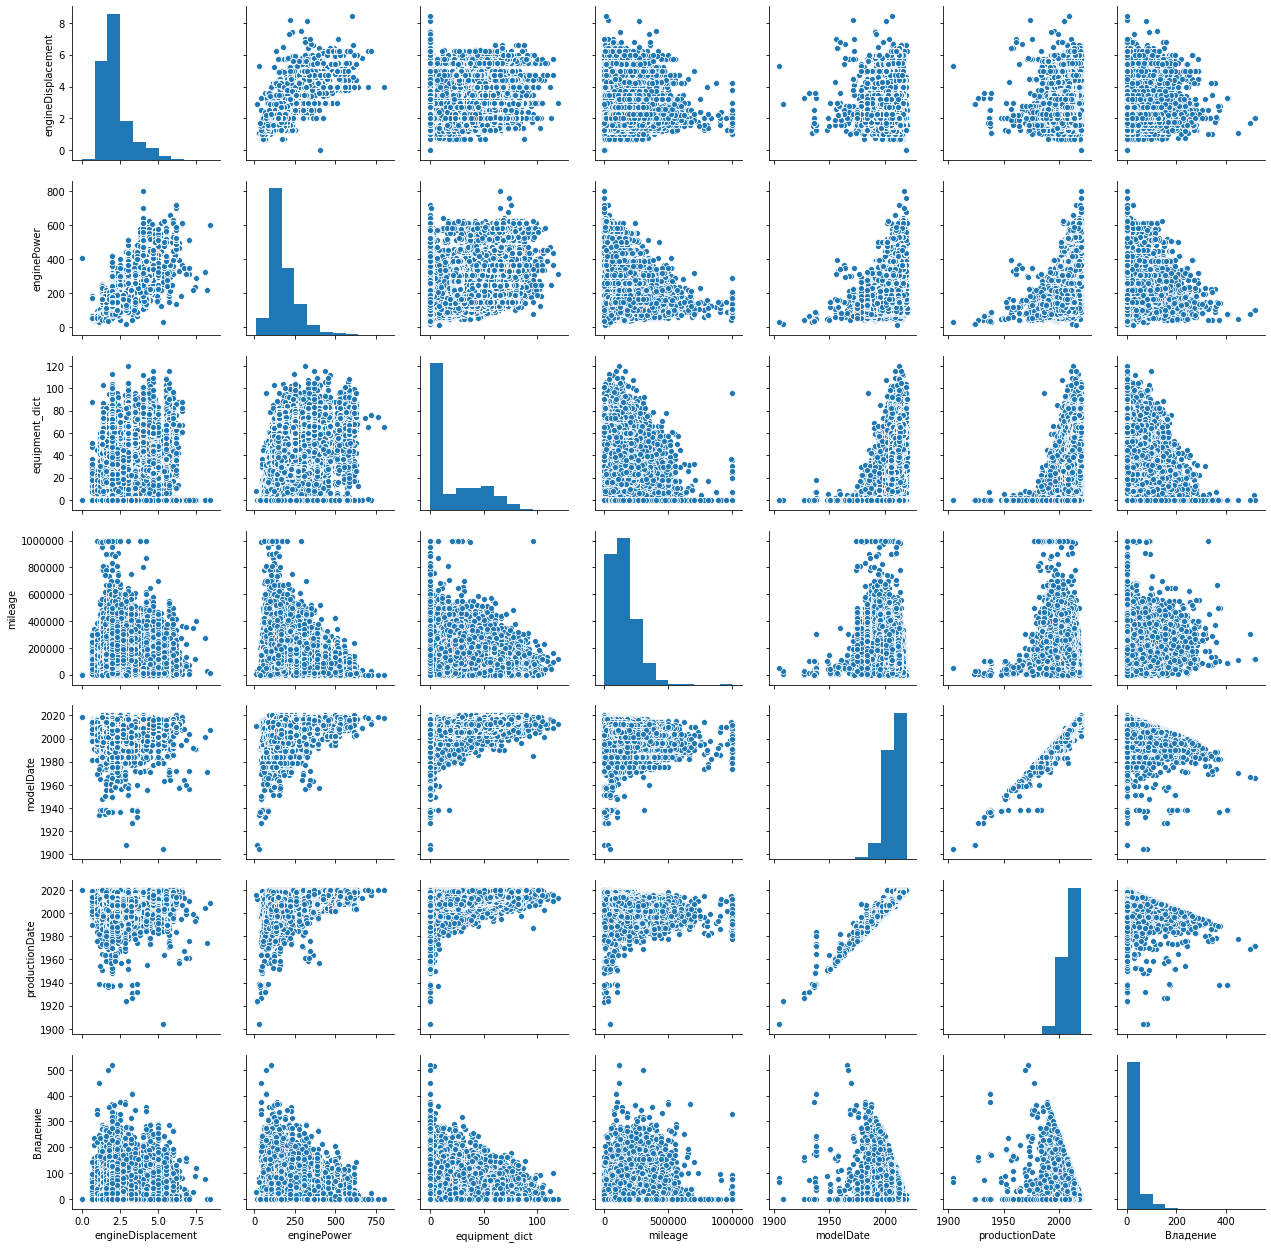

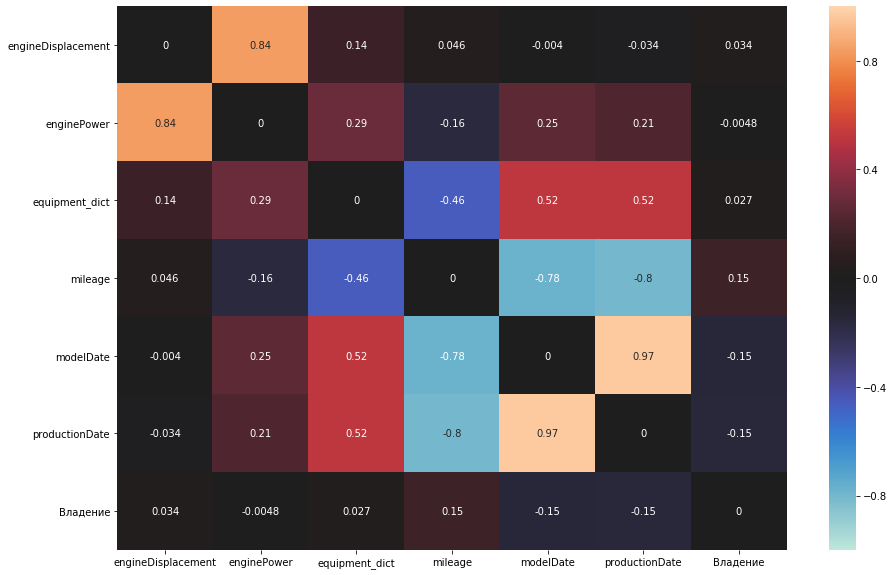

In [16]:
sns.pairplot(externdata_full[num_cols]);
corr_matrix = externdata_full[num_cols].corr(method='spearman')-np.eye(len(num_cols))
plt.figure(figsize = (15,10))
sns.heatmap(corr_matrix, annot = True,vmin=-1, vmax=1, center= 0);

Стоит отметить наличие заметных коррялици в нескольких парах признаков.   
    
Некоторые из корреляций обьясняются причинно-следственной связью признаков, например у таких как `engineDisplacement-enginePower`, `modelDate-productionDate`, `productionDate-mileage` - мощность двигателя зависит от его обьема, дата выпуска машины естественно связана с датой начала производства данной модели, а пробег в общем пропорционален возрасту автомобиля (т.е. связан с датой производства).    
    
Некоторые корреляции можно впролне обьяснить пользуясь здравым смыслом и жизненным опытом. Например 
`modelDate-enginePower`, `productionDate-enginePower` и `modelDate-equipment_dict` - в общем с течением времени мощность двигателей у новых моделей росла, также расла оснащенность автомобилей различными опциями.   
    
Некотрые корреляции не отражают какойлибо причинн-следственной связи и обьясняются зависимостью обех признаков от третьего. Напрмер в парах `equipment_dict-enginePower` и `equipment_dict-mileage` оба признака зависят от даты выпуска авто.   
    
Сделанные выводы о зависимостях помогут на этапе создания новых призгакв. Напрмер можно попробовать заменить один из сильно коррелированных `modelDate` и `productionDate` на разницу между ними, получив таким образом вполне осмысленный признак ***новизна модели***

Посмотрим на взаимную информацию, корреляции Спирмена количественных признаков и целевой переменной, а также на их pairplot-ы.

,engineDisplacement,enginePower,equipment_dict,mileage,modelDate,productionDate,Владение
MI,0.453110,0.935197,0.70549,0.476810,0.788443,0.666336,0.044182
Spearman corr,0.447695,0.660069,0.57651,-0.687421,0.794383,0.788078,-0.119163


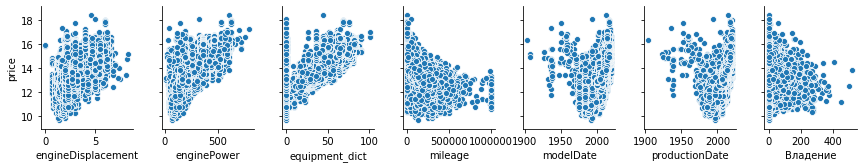

In [21]:
%%time
sns.pairplot(externdata_full[list(num_cols) + ['price']],
             x_vars=list(num_cols) ,
             y_vars=['price'],
             aspect=0.7)

sp_corr = [spearmanr(externdata_full[x],externdata_full.price,nan_policy='omit')[0] 
     for x in  externdata_full[list(num_cols)].dropna()]
without_na = externdata_full[list(num_cols)+['price']].dropna()
mi = mutual_info_regression(without_na[num_cols],without_na.price)

pd.DataFrame({'MI':mi,'Spearman corr':sp_corr},index = num_cols).T

Как видиим ... .... ..   
.... ..   
.... ..   
.... ..

### Детальное изучение
Теперь рассмотрим каждый признак отдельно, а именно 
- постоим график и box-plot признака на test и всем train, 
- график и box-plot признака на test и на данных train для марок встречающтхся в test.    
визуально сравним распределения.  
- затем построим зависимость целевой переменной от признака для трех самых популярных марок.

Получим три наиболее часто встречающиеся в data марки и модели:

Приступим к изучению признаков
### engineDisplacement
признак описывает обьем двигателя. 

In [247]:
def num_visualisation(column,df, left_sloping=False):
    '''
    Визулизация распределения количественного ризнака:
        - гистограмма распределения в валидационной и в полной обучающей выборке 
        - boxplot распределения в валидационной и в полной обучающей выборке
        - гистограмма распределения  в валидационной выборке и в обучающей выборке на марках, 
        встречающихся в валидационной выборке
        - boxplot рапсределения в валидационной выборке и в обучающей выборке на марках, 
        встречающихся в валидационной выборке
    '''
    trn = df[df['sample']==1].dropna(subset=[column,'price'])
    tst = df[df['sample']==0].dropna(subset=[column])
    tst_brands = tst.brand.unique()
    brand_mask = [x in tst_brands for x in trn.brand]
    trn_ = trn[brand_mask]
    
    row_trn = trn[column] 
    row_tst = tst[column] 
    row_trn_ = trn_[column]     

    if left_sloping: 
        row_trn = np.log(2022 - row_trn)
        row_tst = np.log(2022 - row_tst)
        row_trn_ = np.log(2022 - row_trn_)        
    else:
        row_trn = np.log(row_trn+1)
        row_tst = np.log(row_tst+1)
        row_trn_ = np.log(row_trn_+1)
    
    fig = plt.figure(figsize=(14,4))
    
    nbins = 50
    rows_max = max(row_trn.max(),row_tst.max())
    rows_min = min(row_trn.min(),row_tst.min())    
    step = (rows_max-rows_min)/nbins
    bins = list(np.arange(rows_min,rows_max,step))
#*****************************ax1***********************************
    ax1 = fig.add_axes([0, 0.5, 0.45, 1])
    plt.title('Распределение '+column+' в train\n (на всех марках) и в test' )
    row_trn.plot.hist(bins=bins,density=True,alpha = 0.65)
    row_trn_.plot.hist(bins=bins,density=True,alpha = 0.65)    
    row_tst.plot.hist(bins=bins,density=True,alpha = 0.65)
    plt.legend(['full train','train with brand from test','test']) 
#*****************************ax2***********************************
    ax2 = fig.add_axes([0, 0, 0.45, 0.40]) 
    sns.boxplot(data = [row_trn,row_trn_,row_tst],orient='h',saturation = 0.5)
#*****************************ax3***********************************
#     ax3 = fig.add_axes([0.7, 0, 0.30, 1.5])
#     plt.title('Зависимость цены\n от '+column+' в logscale')
#     x = row_trn
#     y = trn.price
#     ax3.set(xlim=(x.min(), x.max()), ylim=(y.min(), y.max()))
#     ax3.hexbin(x,y, gridsize=25,bins='log')
#     plt.show() 
#*****************************ax3***********************************    
    ax3 = fig.add_axes([0.7, 0, 0.30, 1.5])
    plt.title('Зависимость цены\n от '+column+' в logscale')
    x = rankdata(row_trn)
    y = rankdata(trn.price)
    ax3.set(xlim=(x.min(), x.max()), ylim=(y.min(), y.max()))
    ax3.hexbin(x,y, gridsize=50,bins='log')
    plt.show()     

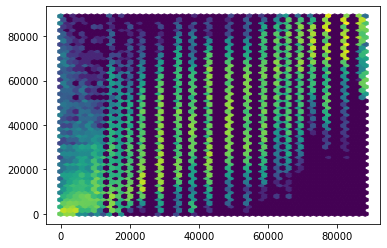

In [248]:
dff = externdata_full#[externdata_full.brand == "MERCEDES"]
x = rankdata(dff.modelDate[dff.price.dropna().index] ) # ,method='ordinal'
y = rankdata(dff.price.dropna())
plt.hexbin(x,y, gridsize=50,bins='log')

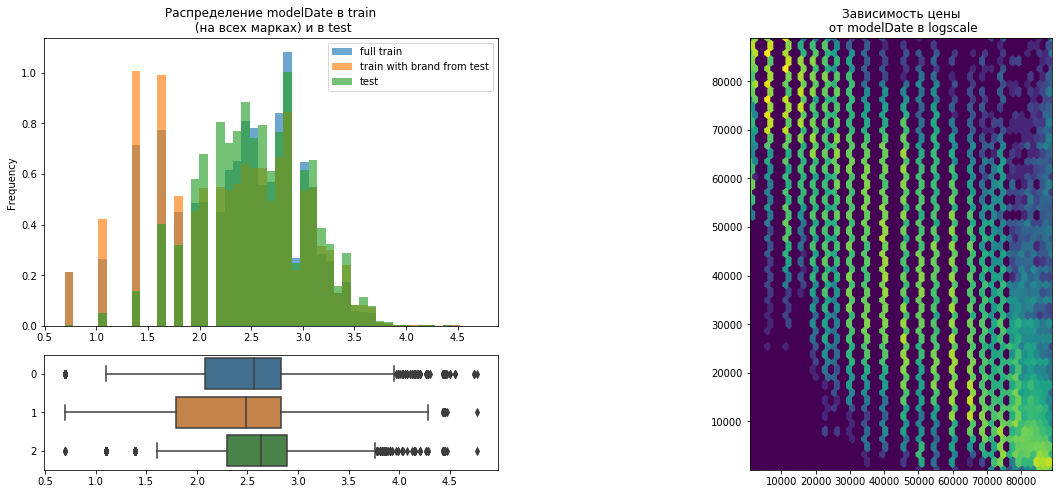

Wall time: 1.17 s


In [250]:
%%time
num_visualisation('modelDate',externdata_full,left_sloping=True)

In [223]:
num_cols

Index(['engineDisplacement', 'enginePower', 'equipment_dict', 'mileage',
       'modelDate', 'productionDate', 'Владение'],
      dtype='object')

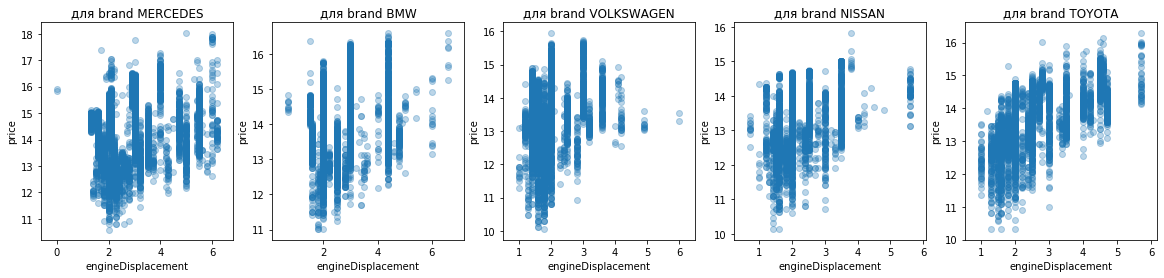

In [37]:
features_price_scatterplot(externdata_full,'engineDisplacement','brand',5)

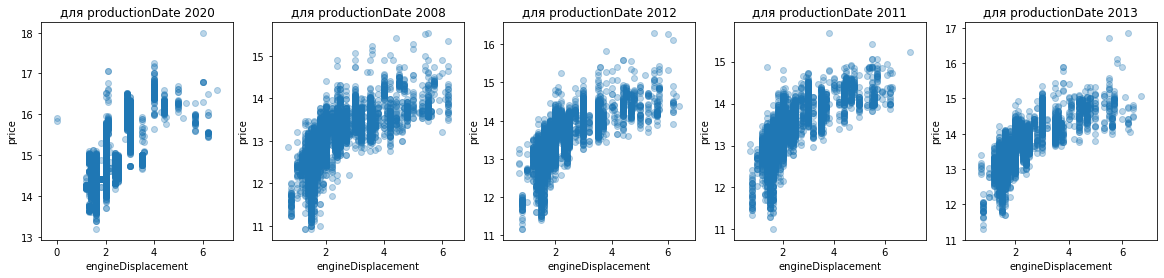

In [38]:
features_price_scatterplot(externdata_full,'engineDisplacement','productionDate',5)

In [57]:
val_cnts = df.modelDate.value_counts().sort_index()
new_val_cnts = pd.Series(val_cnts.index,val_cnts.index)
from_year = val_cnts.index[0]

for year, cnt in zip(val_cnts.index,val_cnts):
    if val_cnts.loc[from_year:year].sum() >= 5: 
        new_val_cnts.loc[from_year:year] = year
        from_year = year+1

In [58]:
%time
column = 'engineDisplacement'
by_feat = 'modelDate'
df = externdata_full[externdata_full['sample']==1].dropna(subset=[column,'price'])
df.modelDate = df.modelDate.map(new_val_cnts)
gr = df.groupby(by_feat)
gr_mi = gr.apply(lambda x: mutual_info_regression(x[[column]],x.price))
gr_spcorr = gr.apply(lambda x: spearmanr(x[[column]],x.price))
gr_mi.mean()[0],gr_mi.std(),gr_spcorr.apply(lambda x: x[0]).mean(),gr_spcorr.apply(lambda x: x[0]).std()

Wall time: 0 ns


(0.4102948319326417,
 0.32761073419328685,
 0.538644533771213,
 0.30204802951568815)

In [56]:
df.modelDate.map(new_val_cnts).value_counts().sort_index()

1927       6
1936      10
1937       5
1938       9
1950       5
1955       8
1958       9
1959       5
1961       5
1964       6
1967       5
1968       7
1970       5
1971       9
1972      10
1974      11
1975      32
1976       8
1977      11
1978      10
1979      42
1980      17
1981      16
1982     102
1983      98
1984     158
1985      53
1986     171
1987     171
1988     308
1989     125
1990     424
1991     464
1992     382
1993     335
1994     613
1995    1244
1996     608
1997     836
1998    1217
1999    1430
2000    2542
2001    1415
2002    3271
2003    1946
2004    3176
2005    4690
2006    6112
2007    4129
2008    4050
2009    5678
2010    5831
2011    4733
2012    4480
2013    3248
2014    3538
2015    3517
2016    3276
2017    5615
2018    5150
2019    1923
2020    1548
Name: modelDate, dtype: int64

1    0
dtype: int64

In [122]:
# ind = val_cnts.index.to_list().index(1904)
# val_cnts.iloc[ind]

### категориальные

In [12]:
cat_cols

Index(['bodyType', 'color', 'fuelType', 'numberOfDoors', 'vehicleTransmission',
       'vendor', 'Владельцы', 'ПТС', 'Привод', 'model_name', 'brand'],
      dtype='object')

### бинарные

In [13]:
bin_cols

Index(['Руль'], dtype='object')

In [ ]:
cat_cols = data.columns[(num_uniq>2) & (num_uniq<28)].append(pd.Index(['model_name','brand'])) 

In [ ]:
num_cols = data.columns[num_uniq>=28].drop(time_col).drop(['model_name','brand','price'])

# ============================

%%html
<html>
<body>
<table>
        <tr> 
            <th>Name</th> 
            <th>Country</th> 
            <th>Age</th> 
        </tr> 
        <tr> 
            <td>Sid</td> 
            <td>India</td> 
            <td>22</td> 
        </tr>
        <tr> 
            <td>Dave</td> 
            <td>UK</td> 
            <td>28</td> 
        </tr>
</table>
</body>
</html>

In [ ]:
%lsmagic

In [ ]:
%time?

In [ ]:
%%timeit
1

In [ ]:
def features_price_scatterplot(df,column,):
    fig, ax = plt.subplots(1,len(most_popular_brands), figsize=(16, 6))
    for i,brand in enumerate(most_popular_brands):
        tmp = df[df.brand==brand]
        ax[i].scatter(x = tmp[column], y = tmp.price, alpha=0.3)
        ax[i].set_title('для автмобилей марки ' + brand)
        ax[i].set_xlabel(column)
        ax[i].set_ylabel("price")
        ax[i].set_yscale( "log")
    plt.show()

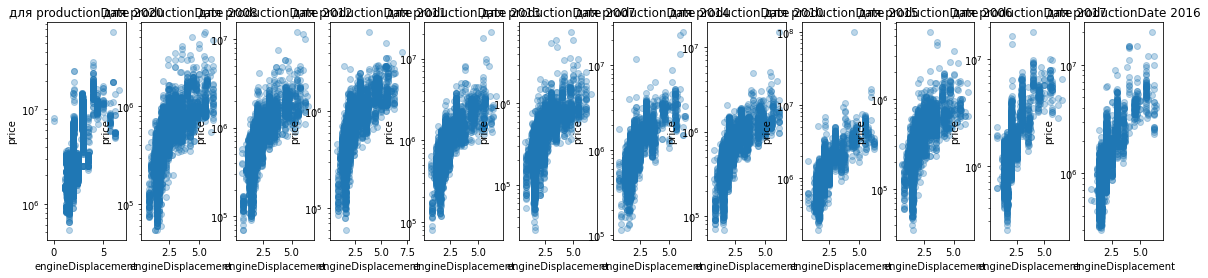

In [40]:
features_price_scatterplot(externdata_full,'engineDisplacement','productionDate',12)

In [ ]:
# Поскольку в дальнейшем мы, вероятно, будем среди прочих использовать модели чувствительные к сильно ненормальному распределению признака, то применим к признакам преобразование (`log(x+1)` для скошенных вправо и `log(2022-x)` для сошеных влево).  
# Посмотрим на результат:

# to_log = ['engineDisplacement', 'enginePower', 'equipment_dict','mileage','Владение']
# to_minus_log = ['modelDate', 'productionDate']
# externdata_full[to_log] = np.log(externdata_full[to_log]+1)
# externdata_full[to_minus_log] = np.log(2022 - externdata_full[to_minus_log])

In [ ]:
# Картина улучшилась -  распределения либо стали близки к нормальному, либо скошенность 
# существенно уменьшилась. Далее будем работать спризнаком с учетом преобразования.

# nums_visualisation(np.log(externdata_full[[
#     'engineDisplacement', 'enginePower', 'equipment_dict','mileage','Владение']]+1))

# nums_visualisation(np.log(2022 - externdata_full[['modelDate', 'productionDate']]))

In [70]:
array = np.array([4,2,7,1])
rank = array.argsort().argsort()+1
rank

array([3, 2, 4, 1], dtype=int64)

In [71]:
from scipy.stats import rankdata
a = [4, 2, 7, 1]
rankdata(a)

array([3., 2., 4., 1.])

In [ ]:
x = 
y = externdata_full.price.

In [73]:
externdata_full.price.argsort().argsort()

0             0
1         23407
2         23406
3         23405
4         23404
          ...  
124058    65815
124059    68308
124060    94857
124061    96619
124062    94661
Name: price, Length: 124063, dtype: int64

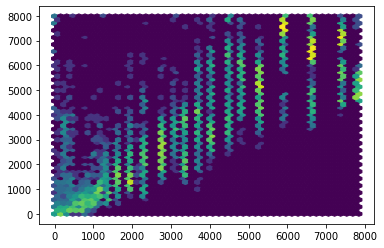

In [222]:

dff = externdata_full[externdata_full.brand == "MERCEDES"]
x = rankdata(dff.modelDate[dff.price.dropna().index] ) # ,method='ordinal'
y = rankdata(dff.price.dropna())
plt.hexbin(x,y, gridsize=50,bins='log')

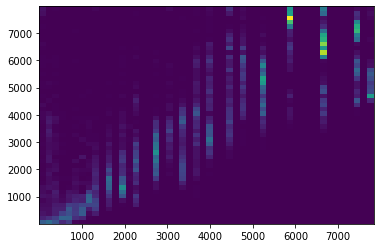

In [221]:
dff = externdata_full[externdata_full.brand == "MERCEDES"]
x = rankdata(dff.modelDate[dff.price.dropna().index] ) # ,method='ordinal'
y = rankdata(dff.price.dropna())
plt.hist2d(x,y,bins=50);

In [219]:
externdata_full.brand.unique()

array(['SKODA', 'AUDI', 'HONDA', 'VOLVO', 'BMW', 'NISSAN', 'INFINITI',
       'MERCEDES', 'TOYOTA', 'LEXUS', 'VOLKSWAGEN', 'MITSUBISHI',
       'CADILLAC', 'CHERY', 'CHEVROLET', 'CHRYSLER', 'CITROEN', 'DAEWOO',
       'DODGE', 'FORD', 'GEELY', 'HYUNDAI', 'JAGUAR', 'JEEP', 'KIA',
       'MAZDA', 'MINI', 'OPEL', 'PEUGEOT', 'PORSCHE', 'RENAULT', 'SUBARU',
       'SUZUKI', 'GREAT_WALL', 'LAND_ROVER', 'SSANG_YONG'], dtype=object)